In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "build")))

In [2]:
from cipells.experiments.continuous1d import *

In [3]:
import numpy as np
from matplotlib import pyplot, colors
%matplotlib notebook

In [68]:
FWHM_FACTOR = 2*np.sqrt(2*np.log(2))
PIXEL_SCALE = 0.10

In [187]:
cellA = {i + 1: Gaussian(scaling=s/(PIXEL_SCALE*FWHM_FACTOR)) for i, s in enumerate([0.65, 0.68, 0.70, 0.85])}

In [188]:
cellB = {n: psf for n, psf in cellA.items() if n != 4}

In [193]:
cellC = {n: psf for n, psf in cellA.items() if n != 1}

In [194]:
def computeCoaddPsfSize(cell):
    x = np.concatenate([np.arange(0, 32, dtype=float),
                        np.arange(-32, 0, dtype=float)])
    f_z = None
    for n, psf in cell.items():
        v = psf(x)
        pyplot.plot(v, label=str(n))
        t = np.fft.rfft(v)
        if f_z is None:
            f_z = t**2
        else:
            f_z += t**2
    f_z = f_z**0.5
    z = np.fft.irfft(f_z, n=len(x))
    pyplot.plot(z/z.sum(), "--", label="coadd")
    pyplot.legend()
    neff = z.sum()**2/(z**2).sum()
    r = neff/(2*np.pi**0.5)
    return r

0.73608247422680462

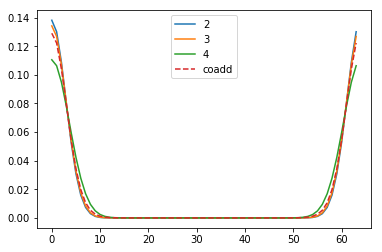

In [196]:
computeCoaddPsfSize(cellC)*PIXEL_SCALE*FWHM_FACTOR

In [178]:
cellA

{1: Gaussian(scaling=5.0, offset=0.0, flux=1.0),
 2: Gaussian(scaling=5.5, offset=0.0, flux=1.0),
 3: Gaussian(scaling=5.8, offset=0.0, flux=1.0),
 4: Gaussian(scaling=6.2, offset=0.0, flux=1.0)}